In [11]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [12]:
### Load data

File_Names= [["a3_b3_g1.0_e2_1_1", "a3_b3_g1.0_e2_1_2", "a3_b3_g1.0_e2_1_3", "a3_b3_g1.0_e2_1_4"], ["a3_b3_g1.5_e2_1_1", "a3_b3_g1.5_e2_1_2", "a3_b3_g1.5_e2_1_3", "a3_b3_g1.5_e2_1_4"], ["a3_b3_g2.0_e2_1_1", "a3_b3_g2.0_e2_1_2", "a3_b3_g2.0_e2_1_3", "a3_b3_g2.0_e2_1_4"], ["a3_b3_g2.1_e2_1.0_1", "a3_b3_g2.1_e2_1.0_2", "a3_b3_g2.1_e2_1.0_3", "a3_b3_g2.1_e2_1.0_4"], ["a3_b3_g2.2_e2_1_5", "a3_b3_g2.2_e2_1_6", "a3_b3_g2.2_e2_1_7", "a3_b3_g2.2_e2_1_8"], ["a3_b3_g2.5_e2_1_5", "a3_b3_g2.5_e2_1_6", "a3_b3_g2.5_e2_1_7", "a3_b3_g2.5_e2_1_8"], ["a3_b3_g3_e2_1_5", "a3_b3_g3_e2_1_6", "a3_b3_g3_e2_1_7", "a3_b3_g3_e2_1_8"]]
g = globals()

files = len(File_Names)
files_2 = len(File_Names[0])

for i in range(len(File_Names)):
    for j in range(len(File_Names[i])):
        g[f"data{files_2*i+j+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i][j]}.csv', delimiter=',')

In [25]:
### Split data in two opinions per Dataset, exclude activity
N = len(data1[0])


for i in range(files * files_2):
    for j in range(2):
        g[f"data_{i+1}_op_{j+1}"] = []
        for k in range (N):
            g[f"data_{i+1}_op_{j+1}"].append( g[f"data{i+1}"][2*k + 1 + j] )

### Determine variances and weigh them over 5 iterations

for i in range(files * files_2):
    for j in range(2):
        g[f"var_{i+1}_{j+1}"] = np.var( g[f"data_{i+1}_op_{j+1}"], axis=1)


for i in range(files):
    for j in range(2):
        g[f"var_weigh_{i+1}_{j+1}"] = np.zeros(N)
        for k in range (N):
            for l in range (files_2):
                g[f"var_weigh_{i+1}_{j+1}"][k] += g[f"var_{files_2*i+1+l}_{j+1}"][k]
            g[f"var_weigh_{i+1}_{j+1}"][k] = g[f"var_weigh_{i+1}_{j+1}"][k] / files_2

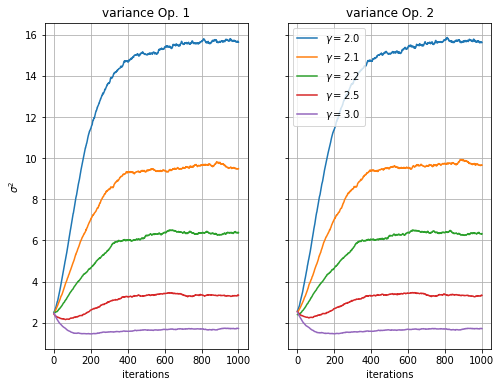

In [26]:
iterations = np.arange(1,N+1)

gamma = [1.0, 1.5, 2.0, 2.1, 2.2, 2.5, 3.0]

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(8,6))

ax[0].set_title("variance Op. 1")
for i in range (5):
    ax[0].plot(iterations, g[f"var_weigh_{i+3}_1"])
ax[0].set_xlabel("iterations")
ax[0].set_ylabel(f"$\sigma^2$")
ax[0].grid()
ax[1].set_title("variance Op. 2")
for i in range (5):
    ax[1].plot(iterations, g[f"var_weigh_{i+3}_2"], label=f"$\gamma = ${gamma[i+2]}")
ax[1].set_xlabel("iterations")
ax[1].grid()
ax[1].legend()
plt.show()

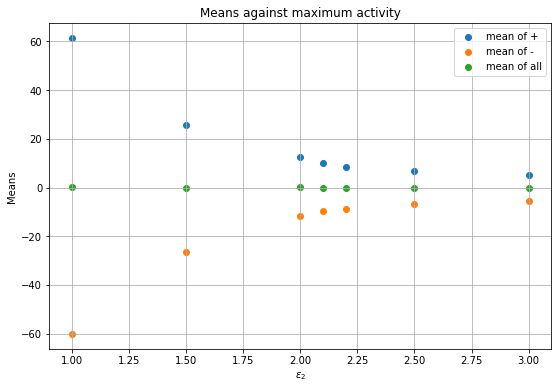

In [15]:
### Calculating mean of distributions

gammas = [1.0, 1.5, 2.0, 2.1, 2.2, 2.5, 3.0]


#means[i][files_2] is the mean of the files_2 means
means = np.zeros((files,files_2+1))

for i in range (files):
    for j in range (files_2):
        means[i][j] = np.mean( g[f"data_{files_2*i+1+j}_op_1"][N-1] )

# Calculating averaged mean
for i in range(files):
    for j in range (files_2):
        means[i][files_2] += means[i][j]
    means[i][files_2] = means[i][files_2]/files_2

# Calculating means of each peak
# Splitting each array into positive and negative values
for i in range(files * files_2):
    g[f"data_{i+1}_op_1_pos"] = []
    g[f"data_{i+1}_op_1_neg"] = []
    for j in range (len( g[f"data_{i+1}_op_1"][N-1] )):
        op = g[f"data_{i+1}_op_1"][N-1][j]
        if op > 0:
            g[f"data_{i+1}_op_1_pos"].append( op )
        else:
            g[f"data_{i+1}_op_1_neg"].append( op )

means_peaks = np.zeros((files,files_2+1,2))

# Calculating (average) peak means
for i in range (files):
    for k in range (2):
        if k == 0:
            for j in range (files_2):
                means_peaks[i][j][k] += np.mean( g[f"data_{files_2*i+1+j}_op_1_pos"])
        else:
            for j in range (files_2):
                means_peaks[i][j][k] += np.mean( g[f"data_{files_2*i+1+j}_op_1_neg"])
    for j in range (files_2):
        means_peaks[i][files_2][0] += means_peaks[i][j][0]
        means_peaks[i][files_2][1] += means_peaks[i][j][1]
    means_peaks[i][files_2][0] += means_peaks[i][files_2][0] / files_2
    means_peaks[i][files_2][1] += means_peaks[i][files_2][1] / files_2

plt.figure(figsize=(9,6))
plt.scatter(gammas, means_peaks[:,files_2,0], label="mean of +")
plt.scatter(gammas, means_peaks[:,files_2,1], label="mean of -")
plt.scatter(gammas, means[:,files_2], label="mean of all")
plt.xlabel(f"$\epsilon_2$")
plt.ylabel("Means")
plt.title("Means against maximum activity")
plt.legend()
plt.grid()
plt.show()

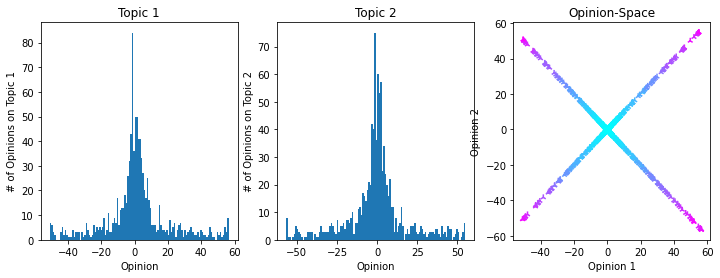

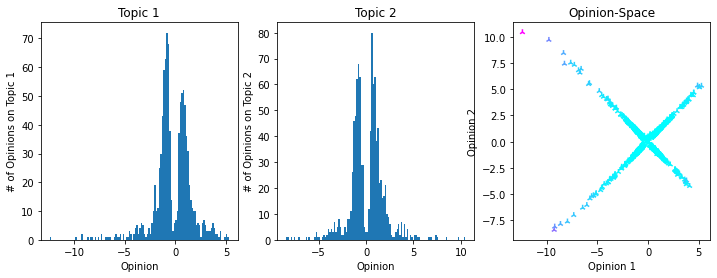

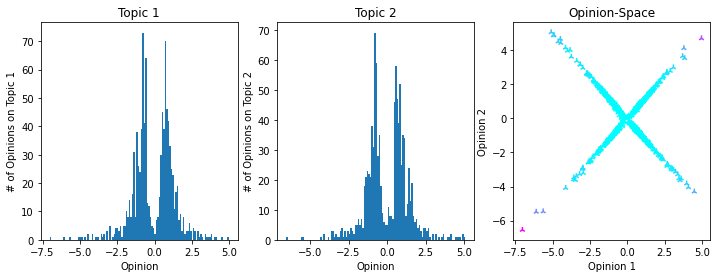

In [16]:
def Plot_Opinion_Distribution_2d(data1, data2, data_act):
    op1_list = data1
    op2_list = data2
    op1_counts = Counter(op1_list)
    op2_counts = Counter(op2_list)

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].set_title("Topic 1")
    ax[0].set_xlabel("Opinion")
    ax[0].set_ylabel("# of Opinions on Topic 1")
    ax[0].hist(op1_list, bins=120)
    ax[1].set_title("Topic 2")
    ax[1].set_xlabel("Opinion")
    ax[1].set_ylabel("# of Opinions on Topic 2")
    ax[1].hist(op2_list, bins=120)
    ax[2].set_title("Opinion-Space")
    ax[2].set_xlabel("Opinion 1")
    ax[2].set_ylabel("Opinion 2")
    ax[2].scatter(op1_list, op2_list, c=data_act, cmap='cool', marker = '2')
    plt.show()

Plot_Opinion_Distribution_2d(data4[len(data4)-2], data4[len(data4)-1], data4[0])
Plot_Opinion_Distribution_2d(data23[len(data23)-2], data23[len(data23)-1], data23[0])
Plot_Opinion_Distribution_2d(data28[len(data28)-2], data28[len(data28)-1], data28[0])